<a href="https://colab.research.google.com/github/hernansalinas/CursoMetodosComputacionales/blob/main/Material_sesiones/ExamenFinal_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación final Métodos computacionales

Profesor: Hernan D. Salinas

Universidad de Antioquia

El examen consta de 8 puntos, Puede utilizar librerías para su solución. La entrega se realiza a través de GitHub. El plazo de entrega es el jueves 13 de marzo a las 10:00 am. Evite el uso de inteligencia artificial y realice un análisis cuidadoso de los errores.



(80 %) En este examen, estudiaremos la caída de un lápiz en posición vertical. El lápiz puede ser modelado como un cuerpo rígido, cuyas ecuaciones de movimiento respecto a su centro de masa pueden ser expresadas de la siguiente manera, de acuerdo con la imagen mostrada en la figura:



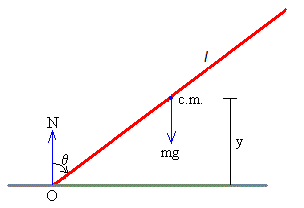


## Ecuaciones de movimiento

### Ecuaciones de movimiento del centro de masa

De acuerdo con la segunda ley de Newton, la ecuación de movimiento a lo largo de la vertical ($y$) puede ser escrita como:

\begin{equation}
m\frac{d^2y}{dt^2} = N - mg
\end{equation}

donde $m$ es la masa del lápiz, $N$ es la fuerza normal y $g$ es la aceleración de la gravedad. Escribiendo las ecuaciones en términos del ángulo $\theta$, tenemos que:

\begin{equation}
-m\frac{l}{2}\cos \theta \left(\frac{d\theta}{dt} \right)^2 - m\frac{l}{2}\sin \theta \frac{d^2\theta}{dt^2} = N - mg
\end{equation}

### Ecuaciones de rotación del centro de masa

La sumatoria de momentos de fuerza se puede escribir como sigue:

\begin{equation}
I_c\frac{d^2\theta}{dt^2} = N\frac{l}{2} \sin \theta
\end{equation}

donde $I_c = \frac{1}{12}ml^2$ es el momento de inercia de una varilla  de masa $m$ y longitud $l$ respecto a un eje perpendicular a la varilla en su centro de masa.

Reemplazando el valor de la normal en la ecuación anterior, obtenemos que la ecuación de movimiento para la posición angular está dada por:

\begin{equation}
\frac{d^2 \theta}{dt^2} = \left( \frac{\frac{2g}{l} - \left(\frac{d\theta}{dt}\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}

Podemos resolver la ecuación anterior si conocemos las condiciones iniciales: $\theta = \theta_0$ en $t = 0$ y $\frac{d\theta}{dt} = \omega_0 = 0$.

Su tarea en este examen será modelar el movimiento de caída del lápiz. Para ello, asuma que la longitud del lápiz es:

$L = 0.1$ m, $g = 9.8$ m/s² y realice lo siguiente:

1. Utilizando `odeint`, encuentre la solución a la ecuación diferencial para obtener: la posición angular $\theta$, la posición del centro de masa $y = \frac{l}{2}\cos \theta$ y la rapidez angular como función del tiempo, asumiendo que $\theta_0 = \pi/12$, $\omega_0 = 0$.

   Nota: El lápiz llega al piso cuando el ángulo es $\theta = \pi/2$.

2. Empleando `matplotlib`, construya tres gráficos con la información del punto anterior, asegurándose de que tengan las unidades respectivas.

3. Con el programa construido en los puntos 1 y 2, analice el efecto del paso del tiempo en la posición angular, la posición del centro de masa y la rapidez angular. Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?

4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.

5. Con los resultados obtenidos, realice una interpolación para cada figura del inciso anterior y encuentre el tiempo de caída, empleando algún método conocido de raíces.

6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la anterior ecuación.

7. Finalmente, realice un gráfico de $T$ como función de $\theta_0$. ¿Qué puede concluir?




### Matrices: Rotación  en el plano, autovalores y autovectores
8 (20%).   Considere la siguiente matrix de rotación:
\begin{bmatrix}
\cos \theta & -\sin \theta\\
\sin \theta & \cos \theta
\end{bmatrix}

a) Encontrar el polinomio característico de A

b) Encontrar los autovalores y autovectores

c) construya la matriz diagonal con los autovalores y autovectores y compruebe su solución.

Encontrar los autovalores y autovectores para $\theta=45$.
**Referencias**: Para más detalle de los cálulos ver:

1. Crawford F. S. Problem: Moments to remember. Am. J. Phys. 57 (2) February 1989, pp. 105, solución 177
2. http://www.sc.ehu.es/sbweb/fisica3/solido/lapiz/lapiz.html

1. a)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import quad

In [ ]:
def dif_ecu(r,t,g,L):

  omega = r[0]
  angulo = r[1]
  dthetadt = omega
  d2thetadt2 = ((((2 * g) / L ) - ((omega) ** 2) * np.cos(angulo)) / ((1. / 3) + np.sin(angulo) ** 2)) * np.sin(angulo)

  return np.array([d2thetadt2,dthetadt])

def pos_cm(L,theta):
  return (L/2) * np.cos(theta)

In [ ]:
#Condiciones inicales
L = 0.1#m
g = 9.8#m/s**2
angulo_i = np.pi / 12
vel_ang = 0
r = np.array([vel_ang, angulo_i])
t = np.linspace(0,1,1000)
theta_r = np.linspace(0,np.pi / 2,1000)
solucion_1 = np.zeros(len(t))
posicion = np.zeros(len(t))
params = (g,L)
#Soluciones
solucion_1 = odeint(dif_ecu,r,t,args = params)
for i in range(len(t)):
  posicion[i] = pos_cm(L,solucion_1[i,1])

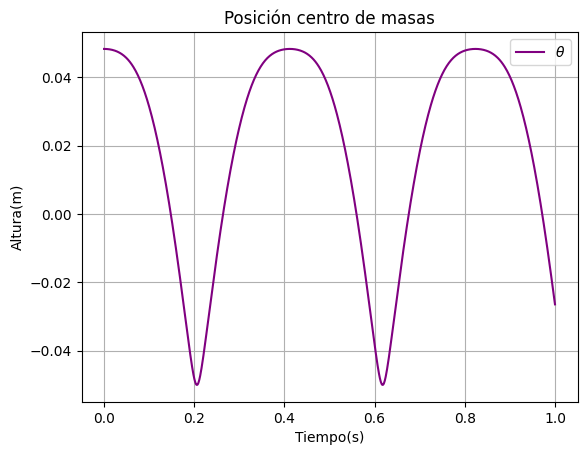

In [ ]:
plt.plot(t,posicion,color = 'purple',label=r'$\theta$')
plt.title('Posición centro de masas')
plt.xlabel('Tiempo(s)')
plt.ylabel('Altura(m)')
plt.legend()
plt.grid()

<ipython-input-44-60e85d912e2a>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


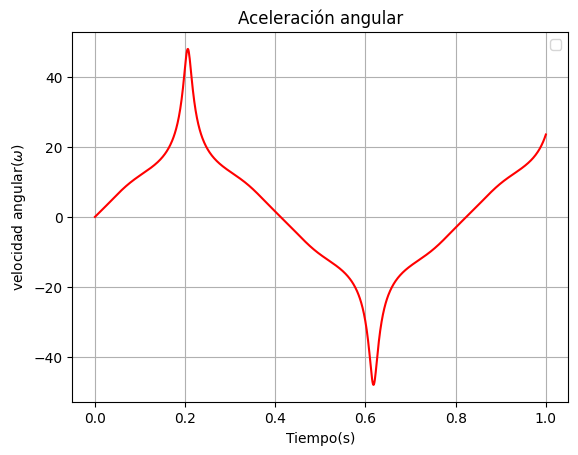

In [ ]:
plt.plot(t,solucion_1[:,0],color="red")
plt.title('Aceleración angular')
plt.xlabel('Tiempo(s)')
plt.ylabel(r'velocidad angular$ (\omega)$')
plt.legend()
plt.grid()

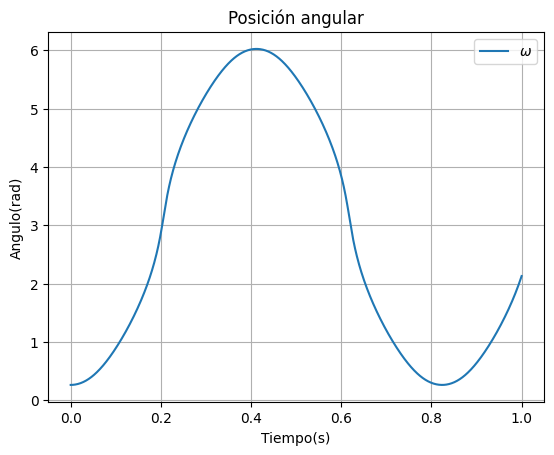

In [ ]:
plt.plot(t,solucion_1[:,1],label=r'$\omega$')
plt.title('Posición angular')
plt.xlabel('Tiempo(s)')
plt.ylabel('Angulo(rad)')
plt.legend()
plt.grid()

c) Para tiempos de 0.2 s la respuesta puede ser considerada valida

d)

In [ ]:
#cambios
a_1 = np.pi / 12
a_2 = np.pi / 6
a_3 = np.pi / 4
a_4 = np.pi / 3
vel = 0
#Definir
t_1 = np.linspace(0,1,50)
solucion_10 = np.zeros(len(t_1))
solucion_9 = np.zeros(len(t_1))
solucion_8 = np.zeros(len(t_1))
solucion_7 = np.zeros(len(t_1))
solucion_1 = odeint(dif_ecu,r,t,args = params)
r_1 = np.array([vel,a_1])
r_2 = np.array([vel,a_2])
r_3 = np.array([vel,a_3])
r_4 = np.array([vel,a_4])

In [ ]:
#Soluciones
solucion_10 = odeint(dif_ecu,r_1,t_1,args = params)
solucion_9 = odeint(dif_ecu,r_2,t_1,args = params)
solucion_8 = odeint(dif_ecu,r_3,t_1,args = params)
solucion_7 = odeint(dif_ecu,r_4,t_1,args = params)

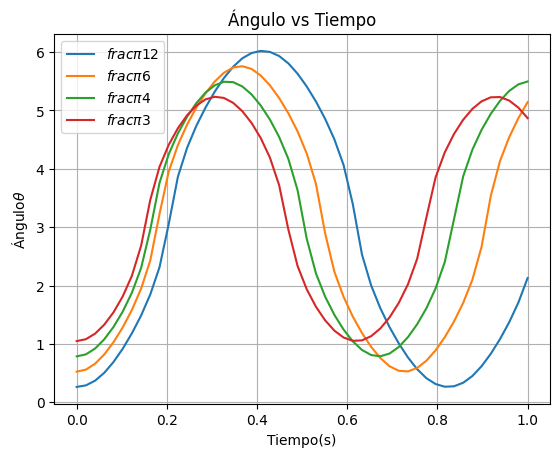

In [ ]:
#Graficas
plt.plot(t_1,solucion_10[:,1],label=r'$frac{\pi}{12}$')
plt.plot(t_1,solucion_9[:,1],label=r'$frac{\pi}{6}$')
plt.plot(t_1,solucion_8[:,1],label=r'$frac{\pi}{4}$')
plt.plot(t_1,solucion_7[:,1],label=r'$frac{\pi}{3}$')
plt.title('Ángulo vs Tiempo')
plt.xlabel('Tiempo(s)')
plt.ylabel(r'Ángulo$\theta$')
plt.legend()
plt.grid()

e)

In [ ]:
from scipy.interpolate import lagrange
from scipy.optimize import root_scalar
import sympy as sp
x = sp.Symbol('x')

polinomio_1 = lagrange(t_1,solucion_10[:,1])
polinomio_2 = lagrange(t_1,solucion_9[:,1])
polinomio_3 = lagrange(t_1,solucion_8[:,1])
polinomio_4 = lagrange(t_1,solucion_7[:,1])

polinomio_01 = sp.expand(polinomio_1(x))
pol_1_dev = sp.diff(polinomio_01,x)
polinomio_02 = sp.expand(polinomio_2(x))
pol_2_dev = sp.diff(polinomio_02,x)
polinomio_03 = sp.expand(polinomio_3(x))
pol_3_dev = sp.diff(polinomio_03,x)
polinomio_04 = sp.expand(polinomio_4(x))
pol_4_dev = sp.diff(polinomio_04,x)

pol_1_numpy = sp.lambdify(x,pol_1_dev,'numpy')
pol_2_numpy = sp.lambdify(x,pol_2_dev,'numpy')
pol_3_numpy = sp.lambdify(x,pol_3_dev,'numpy')
pol_4_numpy = sp.lambdify(x,pol_4_dev,'numpy')
def pol_1(x):
  return pol_1_dev(x)
def pol_2(x):
  return pol_2_dev(x)
def pol_3(x):
  return pol_3_dev(x)
def pol_4(x):
  return pol_4_dev(x)

In [ ]:
#raices
sol_1 = root_scalar(pol_1_numpy,method = 'secant',x0 = 0.3,x1 = 0.5)
sol_2 = root_scalar(pol_2_numpy,method = 'secant',x0 = 0.3,x1 = 0.4)
sol_3 = root_scalar(pol_3_numpy,method = 'secant',x0 = 0.3,x1 = 0.4)
sol_4 = root_scalar(pol_4_numpy,method = 'secant',x0 = 0.2,x1 = 0.4)

print(f'El tiempo de caida para pi/12 {sol_1.root} s')
print(f'El tiempo de caida para pi/6 {sol_2.root} s')
print(f'El tiempo de caida para pi/4 {sol_3.root} s')
print(f'El tiempo de caida para pi/3 {sol_4.root} s')

El tiempo de caida para pi/12 0.3063755529170777 s
El tiempo de caida para pi/6 0.08781254644087227 s
El tiempo de caida para pi/4 0.15077884158899804 s
El tiempo de caida para pi/3 0.18633775726904603 s


f)

In [ ]:
from scipy.integrate import quad

def T_0(l,g):
  return (1/2) * np.sqrt(l / g)
def T(theta,theta_0):
  return np.sqrt(((1/3) + np.sin(theta) ** 2) / (np.cos(theta_0) - np.cos(theta)))

In [ ]:
#Condiciones inicales
theta_0 = np.pi / 12
theta_1 = np.pi / 6
theta_2 = np.pi / 4
theta_3 = np.pi / 3
theta_final = np.pi / 2

In [ ]:
#Integrales
solucion_theta_0 = quad(T,theta_0,np.pi / 2,args = theta_0)
solucion_theta_1 = quad(T,theta_1,np.pi / 2,args = theta_1)
solucion_theta_2 = quad(T,theta_2,np.pi / 2,args = theta_2)
solucion_theta_3 = quad(T,theta_3,np.pi / 2,args = theta_3)

In [ ]:
#Resultados
tiempo_theta_0 = T_0(0.1,9.8) * solucion_theta_0[0]
tiempo_theta_1 = T_0(0.1,9.8) * solucion_theta_1[0]
tiempo_theta_2 = T_0(0.1,9.8) * solucion_theta_2[0]
tiempo_theta_3 = T_0(0.1,9.8) * solucion_theta_3[0]

In [ ]:
print(f'El tiempo de caida para pi/12 {tiempo_theta_0}s')
print(f'El tiempo de caida para pi/6 {tiempo_theta_1}s')
print(f'El tiempo de caida para pi/4 {tiempo_theta_2}s')
print(f'El tiempo de caida para pi/3 {tiempo_theta_3}s')

El tiempo de caida para pi/12 0.1479832354352146 s
El tiempo de caida para pi/6 0.12177877486181128 s
El tiempo de caida para pi/4 0.10332124464084698 s
El tiempo de caida para pi/3 0.08416005040768007 s


Puede ser que el metodo de Lagrange cause un error muy pronunciado en la construcción del polinomio y que por esto no concuerden los valores.

g)

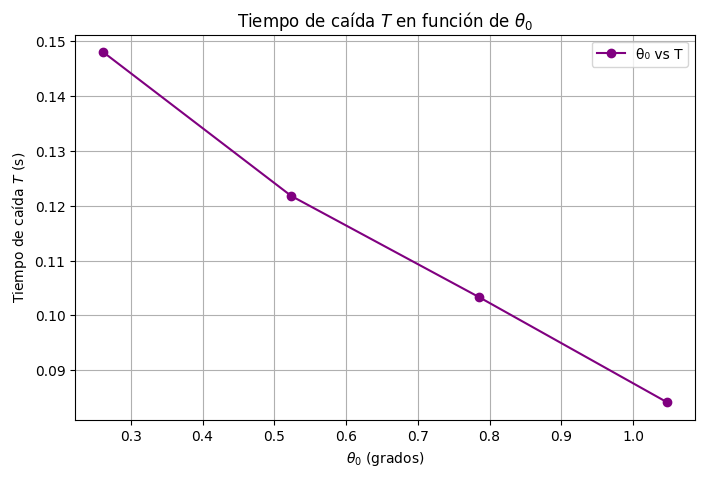

In [ ]:
#Graficos
import matplotlib.pyplot as plt

solucion_theta_general = np.array([tiempo_theta_0,tiempo_theta_1,tiempo_theta_2,tiempo_theta_3])
theta_iniciales = np.array([theta_0,theta_1,theta_2,theta_3])

plt.figure(figsize=(8,5))
plt.plot(theta_iniciales, solucion_theta_general, marker='o', linestyle='-', color='purple', label='θ₀ vs T')

# Etiquetas y título
plt.xlabel(r'$\theta_0$ (grados)')
plt.ylabel(r'Tiempo de caída $T$ (s)')
plt.title(r'Tiempo de caída $T$ en función de $\theta_0$')
plt.grid(True)
plt.legend()
plt.show()

A menor ángulo mayor tiempo de caida

2. a)

In [ ]:
import sympy as sp

x, t = sp.symbols('x t')

A = sp.Matrix([[sp.cos(x), -sp.sin(x)],
               [sp.sin(x),  sp.cos(x)]])

poli_car = (A - t * sp.eye(2)).det()

print(f'Polinomio característico: {poli_car}')


Polinomio característico: t**2 - 2*t*cos(x) + sin(x)**2 + cos(x)**2


b)

In [ ]:
autovalores = A.eigenvals()

autovectores = A.eigenvects()

print('Autovalores:')
print(autovalores)
print('\n')
print('Autovectores')
for valor, _, vectores in autovectores:
    for v in vectores:
        print(f'lambda {valor}, v = {v}')

Autovalores:
{-sqrt((cos(x) - 1)*(cos(x) + 1)) + cos(x): 1, sqrt((cos(x) - 1)*(cos(x) + 1)) + cos(x): 1}


Autovectores
lambda -sqrt((cos(x) - 1)*(cos(x) + 1)) + cos(x), v = Matrix([[sin(x)/sqrt(cos(x)**2 - 1)], [1]])
lambda sqrt((cos(x) - 1)*(cos(x) + 1)) + cos(x), v = Matrix([[-sin(x)/sqrt(cos(x)**2 - 1)], [1]])


c)

In [ ]:
P, D = A.diagonalize()

print(f'Matriz diagonal D:\n{D}')
print(f'Matriz de cambio de base P:\n{P}')


Matriz diagonal D:
Matrix([[-sqrt((cos(x) - 1)*(cos(x) + 1)) + cos(x), 0], [0, sqrt((cos(x) - 1)*(cos(x) + 1)) + cos(x)]])
Matriz de cambio de base P:
Matrix([[sin(x)/sqrt(-sin(x)**2), -sin(x)/sqrt(-sin(x)**2)], [1, 1]])
